In [13]:
#implement linear regressionusing single variable for a sample stored as csv
import pandas as pd 
from sklearn import linear_model
import matplotlib.pyplot as plt

df=pd.read_csv('homeprices.csv')


In [14]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


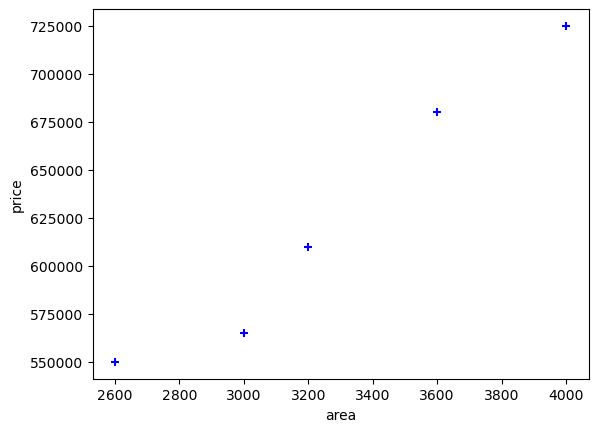

In [22]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='blue',marker='+')

In [16]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)
reg.coef_

array([135.78767123])

In [20]:
reg.intercept_

180616.43835616432

In [19]:
reg.predict([[6800]])

C:\Users\CCL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1103972.60273973])

In [24]:
#implement linear regression using multiple variable for a sample stored as a homeprices.csv
import pandas as pd 
from sklearn import linear_model
import matplotlib.pyplot as plt

df=pd.read_csv('homeprices1.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [25]:
df.bedrooms.median()

4.0

In [28]:
df.bedrooms=df.bedrooms.fillna(df.bedrooms.median())

In [29]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [31]:
x=df.iloc[:,[0,1,2]].values
y=df.iloc[:,3].values
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [32]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [33]:
reg.intercept_

221323.00186540384

In [34]:
reg.predict([[2600,3,30]])

array([485900.45388978])

In [65]:
#kmean clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


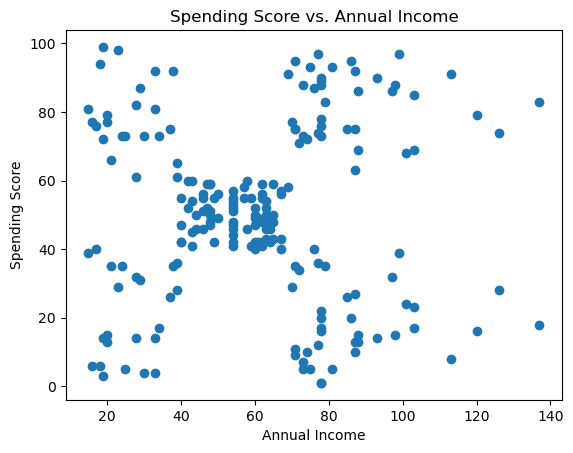

In [66]:
import matplotlib.pyplot as plt

# Example data points
spending_scores =dataset.iloc[:,3].values
annual_incomes = dataset.iloc[:, 4].values

# Plotting the scatter plot
plt.scatter(spending_scores,annual_incomes)
plt.title('Spending Score vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

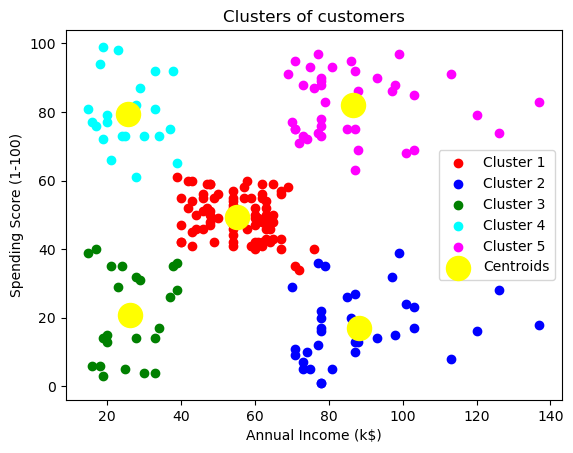

In [67]:
X = dataset.iloc[:, [3, 4]].values

# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label= 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [43]:
#Decision tree clustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [46]:
X=dataset.iloc[:,[2,3]]
y=dataset.iloc[:,4]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sts=StandardScaler()
X_train=sts.fit_transform(X_train)
X_test=sts.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
DecisionTreeClassifier(criterion='entropy', random_state=0)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

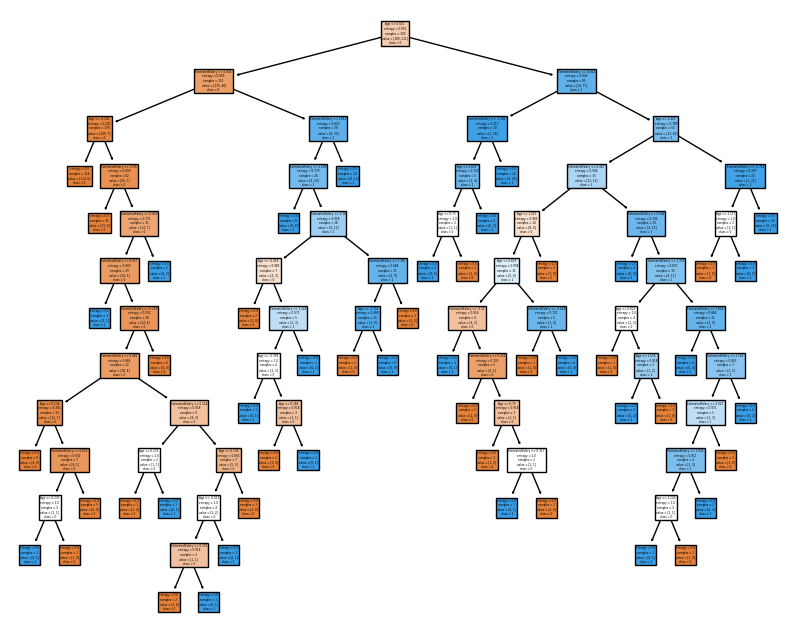

In [49]:
plt.figure(figsize=(10, 8))
plot_tree(classifier, feature_names=['Age', 'EstimatedSalary'], class_names=['0','1'], filled=True)
plt.show()

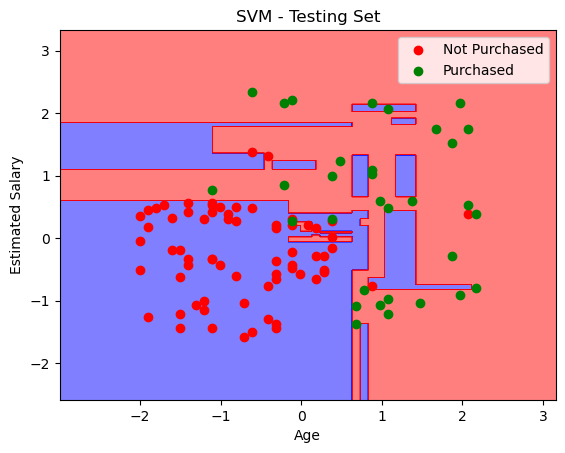

In [51]:
from matplotlib.colors import ListedColormap
# Create a meshgrid of feature values
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:, 0].max() + 1, step =0.01),np.arange(start = X_test[:, 1].min() - 1, stop = X_test[:, 1].max() + 1, step = 0.01))
# Use the trained classifier to make predictions on the meshgrid points
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)
# Create a colormap for the two classes
cmap = ListedColormap(('blue','red'))
# Plot the contour filled by the predictions
plt.contourf(X1, X2, Z, alpha = 0.5, cmap = cmap)

17

# Scatter plot the actual data points
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color = 'red', label ='Not Purchased')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color = 'green', label ='Purchased')
# Add labels and legend
plt.title('SVM - Testing Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
# Show the plot
plt.show()

In [54]:
#density based clustering
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
data = pd.read_csv('blobs.csv')
data

,0,1
0,8.622185,1.935796
1,-4.736710,-7.970958
2,9.621222,0.925423
3,6.162095,-0.273254
4,8.697488,-1.057452
...,...,...
995,8.993880,2.203768
996,-5.082768,-9.644539
997,-6.252268,-8.412482
998,-5.479154,-10.536955


In [55]:
# Extract the features (assuming your CSV file has columns &#39;Feature1&#39; and &#39;Feature2&#39;)
X = data.iloc[:,[0,1]].values
X

array([[  8.62218539,   1.93579579],
       [ -4.73670958,  -7.97095765],
       [  9.62122205,   0.92542315],
       ...,
       [ -6.2522678 ,  -8.412482  ],
       [ -5.479154  , -10.53695547],
       [  6.12055883,   0.96896287]])

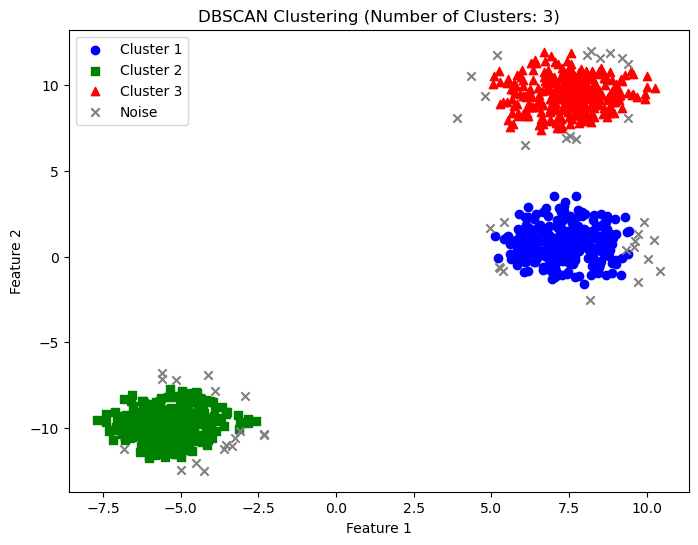

In [57]:
# DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5)
y_db = db.fit_predict(X)

# Number of clusters in labels, ignoring noise if present (-1)
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)


# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[y_db == 0][:, 0], X[y_db == 0][:, 1], c='blue', marker='o', label='Cluster 1')
plt.scatter(X[y_db == 1][:, 0], X[y_db == 1][:, 1], c='green', marker='s', label='Cluster 2')
plt.scatter(X[y_db == 2][:, 0], X[y_db == 2][:, 1], c='red', marker='^', label='Cluster 3')
plt.scatter(X[y_db == -1][:, 0], X[y_db == -1][:, 1], c='gray', marker='x', label='Noise')
plt.legend(loc='best')
plt.title(f'DBSCAN Clustering (Number of Clusters: {n_clusters_})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

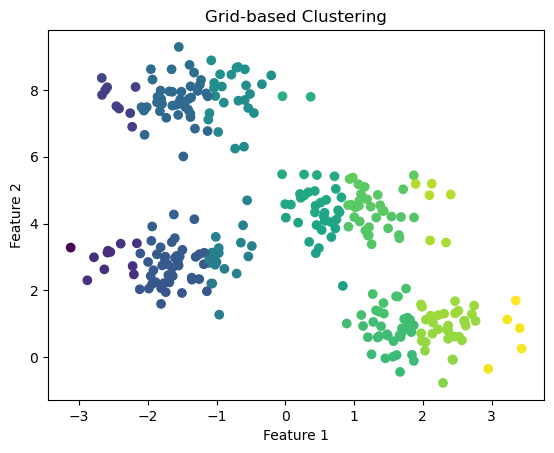

In [61]:
#grid based clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=.60, random_state=0)

# Set the grid size (you can adjust this based on your data distribution)
grid_size = 1.0
# Get the minimum and maximum values for x and y coordinates
x_min, x_max = data[:, 0].min(), data[:, 0].max()
y_min, y_max = data[:, 1].min(), data[:, 1].max()

# Create a grid by defining intervals using the minimum and maximum values
x_grid = np.arange(x_min, x_max + grid_size, grid_size)
y_grid = np.arange(y_min, y_max + grid_size, grid_size)

# Initialize labels array with zeros
labels = np.zeros(data.shape[0], dtype=int)

# Assign each data point to a grid cell based on its coordinates
for i, point in enumerate(data): 
    x, y = point
    x_label = np.searchsorted(x_grid, x) - 1
    y_label = np.searchsorted(y_grid, y) - 1
    labels[i] = x_label * len(y_grid) + y_label

# Visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('Grid-based Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()